In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import os

from aeon.visualisation import plot_critical_difference

In [101]:
df = pd.concat([pd.read_csv(path) for path in glob("*fair_benchmark_*.csv")])

df.head()

,base_method,n_clusters,random_state,time,balance_metric,max_fairness_cost,adjusted_mutual_info,adjusted_rand,completeness,fowlkes_mallows,...,n_jobs,penalty,k_anonymity,l_diversity,t_closeness,strict,use_t,ideal_distribution,K,lmbda
0,kmeans,8.0,42.0,0.216153,0.848085,0.070982,0.001199,-0.009872,0.002218,0.504329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RT,NaN,NaN,1.176718,0.843511,0.072198,0.011524,0.001394,0.028361,0.295331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RT,NaN,NaN,1.182289,0.843511,0.072198,0.011524,0.001394,0.028361,0.295331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RT,NaN,NaN,1.238292,0.843511,0.072198,0.011524,0.001394,0.028361,0.295331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DB,NaN,NaN,12.733239,0.000000,0.603733,0.002796,-0.005872,0.011602,0.720607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
method_name = []
for base_method, penalty in df[['base_method', 'penalty']].values:
    if type(penalty) != str:
        method_name.append(base_method)
    else:
        method_name.append(f"{base_method}_{penalty}")

df['method_name'] = method_name

df.method_name

0       kmeans
1           RT
2           RT
3           RT
4           DB
        ...   
685    FRT_mfc
686    FRT_mfc
687    FRT_mfc
688    FRT_mfc
689    FRT_mfc
Name: method_name, Length: 15358, dtype: object

In [103]:
interesting_columns = ['method_name', 'dataset', 'penalty', 'time', 'silhouette_score', 'balance_metric', 'max_fairness_cost', 'fowlkes_mallows']

Text(0.5, 1.0, 'CD-Plot balance_metric')

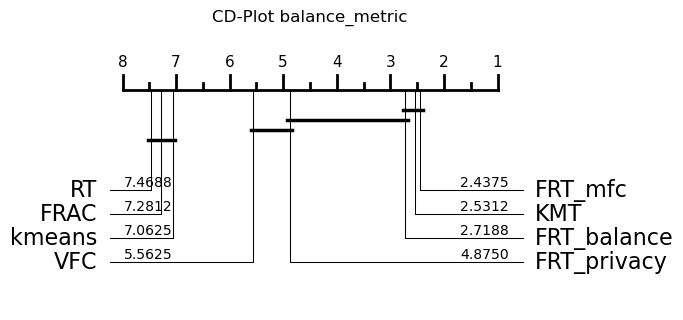

In [104]:
best_column = 'balance_metric'

def dc_plot(df, best_column, lower_better, fillna=-1):

    df1 = df.sort_values(by=[best_column], ascending=lower_better)\
        .groupby(by=['method_name', 'dataset'])\
        .head(1).reset_index()[interesting_columns].sort_values(by=['dataset', 'method_name', best_column])

    scores = df1.pivot(
        columns=['method_name'],
        index='dataset',
        values=best_column,
    ).fillna(fillna)

    labels = scores.columns.values[1:]

    fig, ax = plot_critical_difference(scores.values,
                                    labels,
                                    lower_better=lower_better,
                                    alpha=0.1)

    return fig, ax

dc_plot(df=df, best_column='balance_metric', lower_better=False)
plt.title(f"CD-Plot balance_metric")

Text(0.5, 1.0, 'CD-Plot max_fairness_cost')

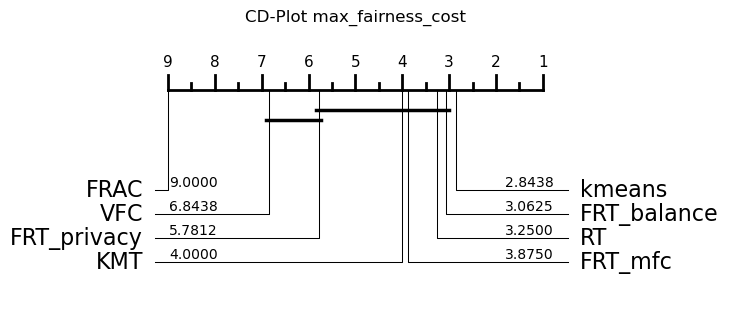

In [105]:
dc_plot(df=df, best_column='max_fairness_cost', lower_better=True)
plt.title(f"CD-Plot max_fairness_cost")

Text(0.5, 1.0, 'CD-Plot silhouette_score')

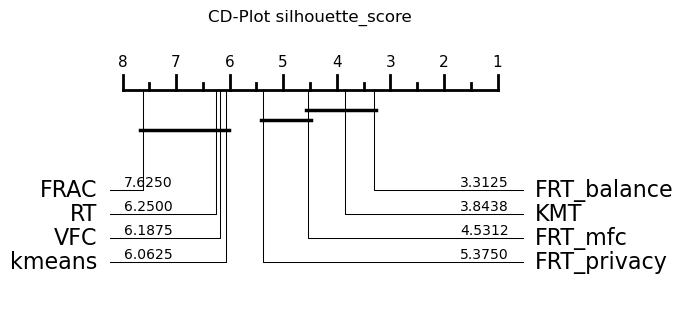

In [106]:
dc_plot(df=df, best_column='silhouette_score', lower_better=False)
plt.title(f"CD-Plot silhouette_score")

Text(0.5, 1.0, 'CD-Plot fowlkes_mallows')

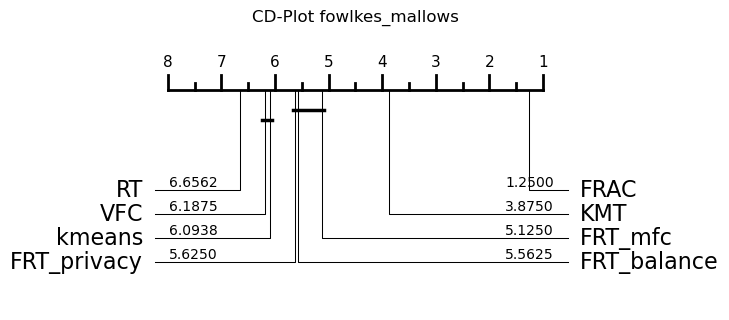

In [107]:
dc_plot(df=df, best_column='fowlkes_mallows', lower_better=False)
plt.title(f"CD-Plot fowlkes_mallows")

In [108]:
df.columns

Index(['base_method', 'n_clusters', 'random_state', 'time', 'balance_metric',
       'max_fairness_cost', 'adjusted_mutual_info', 'adjusted_rand',
       'completeness', 'fowlkes_mallows', 'homogeneity', 'mutual_info',
       'normalized_mutual_info', 'rand_score', 'v_measure', 'silhouette_score',
       'calinski_harabasz', 'davies_bouldin', 'dataset', 'bic_eps',
       'max_leaf_nodes', 'n_rules', 'n_nodes_rules', 'max_depth_rules', 'eps',
       'metric', 'method', 'sensible_attribute', 'penalization_weight',
       'n_jobs', 'penalty', 'k_anonymity', 'l_diversity', 't_closeness',
       'strict', 'use_t', 'ideal_distribution', 'K', 'lmbda', 'method_name'],
      dtype='object')